In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("data.csv")
df_right = df[df["Hand"] == "Right"].copy()
df_left = df[df["Hand"] == "Left"].copy()
df_both = df[df["Hand"] == "Both"].copy()

In [6]:
for name in df["Name"].unique():
    mask_right = df_right["Name"] == name
    df_right.loc[mask_right, "mean(x)"] = df_right.loc[mask_right, "x [cm]"].mean()
    df_right.loc[mask_right, "mean(y)"] = df_right.loc[mask_right, "y [cm]"].mean()

    mask_left = df_left["Name"] == name
    df_left.loc[mask_left, "mean(x)"] = df_left.loc[mask_left, "x [cm]"].mean()
    df_left.loc[mask_left, "mean(y)"] = df_left.loc[mask_left, "y [cm]"].mean()

    mask_both = df_both["Name"] == name
    df_both.loc[mask_both, "mean(x)"] = df_both.loc[mask_both, "x [cm]"].mean()
    df_both.loc[mask_both, "mean(y)"] = df_both.loc[mask_both, "y [cm]"].mean()

In [7]:
df_right["Distance"] = np.sqrt(
    (df_right["mean(x)"] - df_right["x [cm]"]) ** 2
    + (df_right["mean(y)"] - df_right["y [cm]"]) ** 2
)
df_left["Distance"] = np.sqrt(
    (df_left["mean(x)"] - df_left["x [cm]"]) ** 2
    + (df_left["mean(y)"] - df_left["y [cm]"]) ** 2
)
df_both["Distance"] = np.sqrt(
    (df_both["mean(x)"] - df_both["x [cm]"]) ** 2
    + (df_both["mean(y)"] - df_both["y [cm]"]) ** 2
)

In [ ]:
df_right_X = df_right[["Attempt"]]
df_right_y = df_right["Distance"]

df_left_X = df_left[["Attempt"]]
df_left_y = df_left["Distance"]

df_both_X = df_both[["Attempt"]]
df_both_y = df_both["Distance"]

In [17]:
model_right = LinearRegression()
model_right.fit(df_right_X, df_right_y)
model_right.coef_, model_right.intercept_

(array([-0.07330653]), np.float64(3.6832367070079606))

In [20]:
model_both = LinearRegression()
model_both.fit(df_both_X, df_both_y)
model_both.coef_, model_both.intercept_

(array([-0.10851717]), np.float64(3.5962571391974265))

In [21]:
model_left = LinearRegression()
model_left.fit(df_left_X, df_left_y)
model_left.coef_, model_left.intercept_

(array([0.08073247]), np.float64(2.6546451312287327))

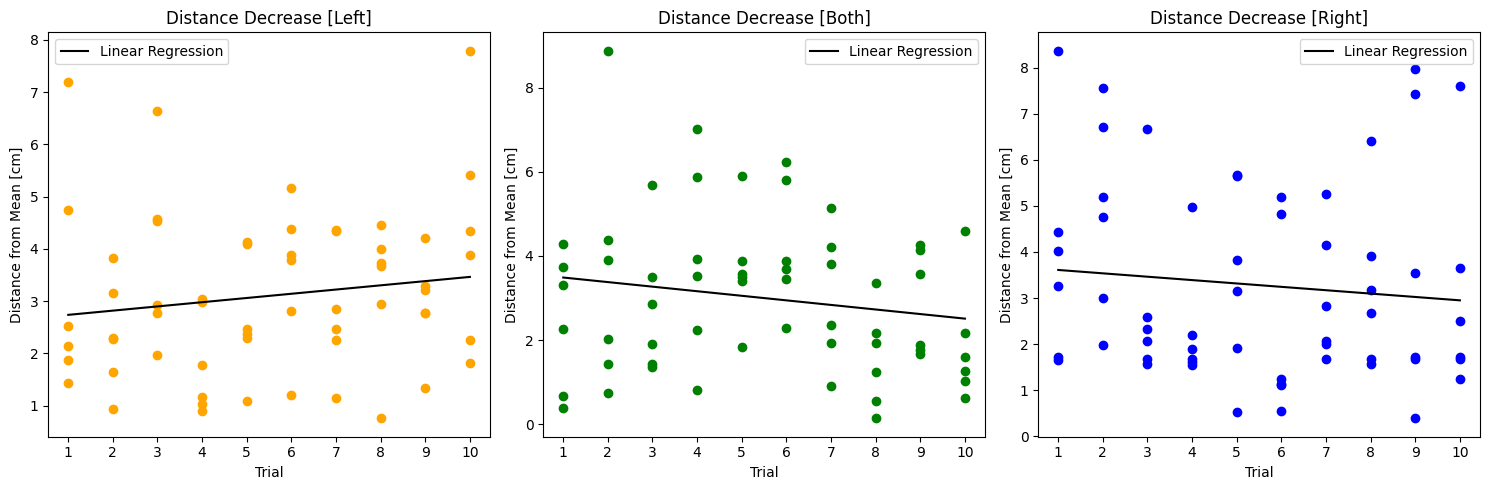

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(df_left["Attempt"], df_left["Distance"], color="orange")
ax[0].plot(
    np.arange(1, 11),
    model_left.coef_[0] * np.arange(1, 11) + model_left.intercept_,
    color="black",
    label="Linear Regression",
)
ax[0].set_title("Distance Decrease [Left]")
ax[0].set_xlabel("Trial")
ax[0].set_ylabel("Distance from Mean [cm]")
ax[0].set_xticks(np.arange(1, 11))
ax[0].legend()

ax[1].scatter(df_both["Attempt"], df_both["Distance"], color="green")
ax[1].plot(
    np.arange(1, 11),
    model_both.coef_[0] * np.arange(1, 11) + model_both.intercept_,
    color="black",
    label="Linear Regression",
)
ax[1].set_title("Distance Decrease [Both]")
ax[1].set_xlabel("Trial")
ax[1].set_ylabel("Distance from Mean [cm]")
ax[1].set_xticks(np.arange(1, 11))
ax[1].legend()

ax[2].scatter(df_right["Attempt"], df_right["Distance"], color="blue")
ax[2].plot(
    np.arange(1, 11),
    model_right.coef_[0] * np.arange(1, 11) + model_right.intercept_,
    color="black",
    label="Linear Regression",
)
ax[2].set_title("Distance Decrease [Right]")
ax[2].set_xlabel("Trial")
ax[2].set_ylabel("Distance from Mean [cm]")
ax[2].set_xticks(np.arange(1, 11))
ax[2].legend()

plt.tight_layout()
plt.show()